In [3]:
import pandas as pd
import numpy as np
import os, fnmatch, re, cv2, random,sys, pickle
import torch
#import imgaug as ia
#import imageio
%matplotlib inline  
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from torch.utils import data
from torchvision import transforms
import torch.nn as nn
sys.path.append('..')

root_locEm = "../"
root_datasets = "../../../../datasets/"
root_ImageNetVidsDevkit = root_datasets+"ImageNetVids/imageNetVidsDevkit.data/"
root_ImageNetVids = root_datasets+"ImageNetVids/imageNetVids.data/"
path_to_frames= root_ImageNetVids+"Data/VID/train/"
path_to_val_frames= root_ImageNetVids+"Data/VID/val/"
path_to_annotations= root_ImageNetVids+"Annotations/VID/train/"

network_dim = 224

In [ ]:
def showTorchTensorImg(img):
    
    #assert img is a torch of size nchw
    return plt.imshow(img.permute(1,2,0).numpy())

In [ ]:
from genINV_Locem_v101 import ImageNetVID
from torch.utils.data import DataLoader
train_dataset = "../../data/metadata_imgnet_vid_train_n2.pkl"

def collate_fn(data):
        
    images_list,target_list = [],[]
    batch_size = len(data)
    
    for batch in range(batch_size):
        images_list.append(data[batch][0])
        target_list.append(data[batch][1])
    
    images = torch.cat(images_list,dim=0)
    targets = torch.cat(target_list,dim=0)
    
    return images,targets

In [ ]:
gen_train = ImageNetVID(root_datasets,train_dataset,split='train')

In [ ]:
train_loader = DataLoader(gen_train,batch_size=1,shuffle=True,collate_fn=collate_fn)

In [ ]:
im = 0
tg = 0
for i, (images,targets) in enumerate(train_loader):
    if i%1000 ==0:
        print(i)
    #print('images.size',images.size())
    #im = images[0]
    #tg = targets[0]
    #break

In [ ]:
a= [1]
b = [2,3]

In [ ]:
a+b

In [ ]:
showTorchTensorImg(im)

In [ ]:
tg_mask = (tg[:,:,4]==1) & (tg[:,:,9]==1)

In [ ]:
tg_mask

In [ ]:
tg_obj=tg[tg_mask]

In [ ]:
tg_obj[0,:4]

In [ ]:
tg_obj[0,:5]

In [11]:
def getOtherObjects(sample,train_data,all_data):
    
    boxes = []
    classes = []
    
    other_samples = all_data[(all_data.folder==sample.folder)&(all_data.file==sample.file)]
    #If there is only 1 object in image then there is nothing to add
    if len(other_samples)==1:
        return [],[]
    #Dropping sample from other
    other_samples = other_samples[other_samples.trackid!=sample.trackid]
    
    for idx in other_samples.index:
        row = other_samples.loc[idx]
        boxes.append([row.xmin,row.ymin,row.xmax,row.ymax])
        classes.append([row.cat_code-1])
    
    boxes = torch.tensor(boxes)
    classes = torch.tensor(classes)
    
    return boxes,classes
    

In [ ]:
b=[[2],[3],[4]]
bt = torch.tensor(b)
bt.size()

In [4]:
td = pd.read_pickle('../../data/metadata_imgnet_vid_train_n2.pkl')

In [5]:
ad = pd.read_pickle('../../data/metadata_imgnet_vid_train.pkl')

In [ ]:
for i in range(len(td)):
    

In [6]:
idx = 6

In [12]:
b,c = getOtherObjects(td.loc[idx],td,ad)
b,c

(tensor([[ 46, 341, 350, 563]]), tensor([[1]]))

In [13]:
c.size()

torch.Size([1, 1])

In [14]:
img_file = td.loc[idx].file
folder = td.loc[idx].folder
folder,img_file

('ILSVRC2015_VID_train_0002/ILSVRC2015_train_00559000', '000009')

In [15]:
nad = ad[(ad.folder==folder)&(ad.file==img_file)]
nad

,cat_code,snip_id,folder,file,width,height,wnid,trackid,xmax,xmin,ymax,ymin
506,2,00559000,ILSVRC2015_VID_train_0002/ILSVRC2015_train_005...,000009,1280,720,n02419796,0,350,46,563,341
507,2,00559000,ILSVRC2015_VID_train_0002/ILSVRC2015_train_005...,000009,1280,720,n02419796,1,1251,1029,494,273


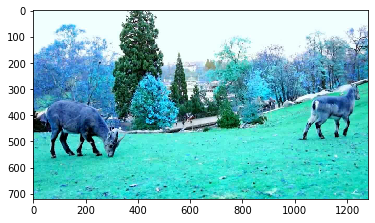

In [16]:
plt.imshow(cv2.imread(path_to_frames+folder+'/'+img_file+'.JPEG'))

i 6
     cat_code   snip_id                                             folder  \
506         2  00559000  ILSVRC2015_VID_train_0002/ILSVRC2015_train_005...   
507         2  00559000  ILSVRC2015_VID_train_0002/ILSVRC2015_train_005...   

       file  width  height       wnid  trackid  xmax  xmin  ymax  ymin  
506  000009   1280     720  n02419796        0   350    46   563   341  
507  000009   1280     720  n02419796        1  1251  1029   494   273  


sample
cat_code                                                    2
snip_id                                              00559000
folder      ILSVRC2015_VID_train_0002/ILSVRC2015_train_005...
file                                                   000009
width                                                    1280
height                                                    720
wnid                                                n02419796
trackid                                                     1
xmax                                 

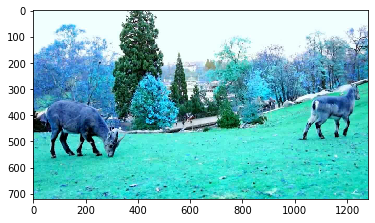

In [17]:
s = 0
n = 0
for i in range(10):
    sample = td.loc[i]
    nad = ad[(ad.folder==sample.folder)&(ad.file==sample.file)]
    if len(nad) >1:
        s=sample
        n=nad
        print('i',i)
        print(nad)
        print('\n')
        print('sample')
        print(sample)
        plt.imshow(cv2.imread(path_to_frames+sample.folder+'/'+sample.file+'.JPEG'))
        break

In [18]:
s

cat_code                                                    2
snip_id                                              00559000
folder      ILSVRC2015_VID_train_0002/ILSVRC2015_train_005...
file                                                   000009
width                                                    1280
height                                                    720
wnid                                                n02419796
trackid                                                     1
xmax                                                     1251
xmin                                                     1029
ymax                                                      494
ymin                                                      273
Name: 6, dtype: object

In [19]:
n

,cat_code,snip_id,folder,file,width,height,wnid,trackid,xmax,xmin,ymax,ymin
506,2,00559000,ILSVRC2015_VID_train_0002/ILSVRC2015_train_005...,000009,1280,720,n02419796,0,350,46,563,341
507,2,00559000,ILSVRC2015_VID_train_0002/ILSVRC2015_train_005...,000009,1280,720,n02419796,1,1251,1029,494,273


In [20]:
nm = n[n.trackid!=s.trackid]
nm

,cat_code,snip_id,folder,file,width,height,wnid,trackid,xmax,xmin,ymax,ymin
506,2,00559000,ILSVRC2015_VID_train_0002/ILSVRC2015_train_005...,000009,1280,720,n02419796,0,350,46,563,341


In [21]:
for i in n.index:
    row = n.loc[i]
    print(row.xmin,row.ymin)

46 341
1029 273


In [30]:
nm.index.to_numpy()[0]

506

In [32]:
type(int(nm.index.array[0]))

int

In [33]:
a = [[1,2,3],[1,3,4]]

array([[ 6.92715613e-310,  6.92715613e-310,  4.64221433e-310,
         4.64221433e-310,  4.94065646e-324,  4.64221433e-310,
                     nan,  6.92715448e-310,  2.60368884e-311,
         0.00000000e+000,  4.94065646e-324,  6.92683086e-310,
         4.64221433e-310,  6.92715538e-310,  4.94065646e-324,
         4.94065646e-324,  4.94065646e-324,  4.64221433e-310,
         9.88131292e-324,  4.64221433e-310,  4.64221433e-310,
         4.64207799e-310,  4.64221084e-310,  8.39911598e-323,
         4.64221084e-310,  2.12199579e-313,  6.80194554e+053,
         4.64221084e-310,  8.39911598e-323,  4.64221084e-310,
         2.54639495e-313,  1.18575755e-322,  6.92695582e-310,
         4.94065646e-324,  4.64221433e-310,  2.12199579e-313,
         0.00000000e+000,  0.00000000e+000,  6.92683086e-310,
         4.64221433e-310,  4.64221433e-310,  4.64221433e-310,
         4.94065646e-324,  1.08694442e-322,  4.64221433e-310,
         1.42290906e-321,  4.44659081e-323,  6.92695584e-310,
        

In [38]:
arr = np.empty((3,5),dtype=float)

In [39]:
arr

array([[0.36694297, 0.99338703, 0.45019652, 0.76852228, 0.8515361 ],
       [0.25846017, 0.90466812, 0.32135464, 0.53616047, 0.02953188],
       [0.12242351, 0.68649237, 0.7528287 , 0.23853606, 0.71643063]])

In [40]:
np.append(arr,np.random.rand(3,5),axis=0)

array([[0.36694297, 0.99338703, 0.45019652, 0.76852228, 0.8515361 ],
       [0.25846017, 0.90466812, 0.32135464, 0.53616047, 0.02953188],
       [0.12242351, 0.68649237, 0.7528287 , 0.23853606, 0.71643063],
       [0.28734582, 0.27431062, 0.72879716, 0.61152579, 0.50116415],
       [0.61170061, 0.41143848, 0.92989428, 0.11677419, 0.25733902],
       [0.71896121, 0.42252992, 0.85344388, 0.39105374, 0.61793431]])

In [48]:
b = []

In [49]:
b.append(np.random.rand(5))

In [50]:
b.append(np.random.rand(5))

In [51]:
bn = np.array(b)
bn.shape

(2, 5)

In [ ]:
c = []